Pytorch

Pytorch Basic

Pytorch import

In [1]:
import torch 

print(torch.__version__)

2.3.0+cpu


Pytorch 맛보기

In [2]:
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda, Compose
import matplotlib.pyplot as plt
import numpy as np

In [3]:
## MNIST Data down 받기

# 공개 데이터셋에서 학습 데이터를 내려받습니다.
training_data = datasets.MNIST(
    root='data',
    train=True,
    download=True,
    transform=ToTensor(),
)

# 공개 데이터셋에서 테스트 데이터를 내려받습니다.
test_data = datasets.MNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor(),
)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:04<00:00, 2436223.24it/s]


Extracting data\MNIST\raw\train-images-idx3-ubyte.gz to data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 147060.38it/s]


Extracting data\MNIST\raw\train-labels-idx1-ubyte.gz to data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:01<00:00, 1146090.64it/s]


Extracting data\MNIST\raw\t10k-images-idx3-ubyte.gz to data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 4375408.54it/s]

Extracting data\MNIST\raw\t10k-labels-idx1-ubyte.gz to data\MNIST\raw



In [4]:
batch_size = 64

# 데이터 로더를 생성합니다.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print("Shape of X [N, C, H, W]: ", X.shape)
    print("Shape of y: ", y.shape)
    break

Shape of X [N, C, H, W]:  torch.Size([64, 1, 28, 28])
Shape of y:  torch.Size([64])


In [5]:
# 학습에 사용할 CPU나 GPU 장치를 얻습니다.
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))

# 모델을 정의 합니다.
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 10)
        )
    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

Using cpu device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=128, out_features=10, bias=True)
  )
)


In [6]:
# Loss 함수와 Optimizer 설정
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [13]:
# Training을 위한 함수
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # 예측 오류 계산
        pred = model(X)
        loss = loss_fn(pred, y)

        # 역전파
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 ==0:
            loss, current = loss.item(), batch *len(X)
            print(f"loss: {loss:>7f} [{current:>5d}/{size:>5d}]")

In [14]:
# Test를 위한 함수
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [15]:
epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.220950 [    0/60000]
loss: 0.438483 [ 6400/60000]
loss: 0.320953 [12800/60000]
loss: 0.417390 [19200/60000]
loss: 0.238263 [25600/60000]
loss: 0.428717 [32000/60000]
loss: 0.138721 [38400/60000]
loss: 0.369483 [44800/60000]
loss: 0.237460 [51200/60000]
loss: 0.363964 [57600/60000]
Test Error: 
 Accuracy: 93.8%, Avg loss: 0.205101 

Epoch 2
-------------------------------
loss: 0.119571 [    0/60000]
loss: 0.175439 [ 6400/60000]
loss: 0.107483 [12800/60000]
loss: 0.178502 [19200/60000]
loss: 0.181430 [25600/60000]
loss: 0.251769 [32000/60000]
loss: 0.070277 [38400/60000]
loss: 0.239339 [44800/60000]
loss: 0.163925 [51200/60000]
loss: 0.217349 [57600/60000]
Test Error: 
 Accuracy: 95.7%, Avg loss: 0.138000 

Epoch 3
-------------------------------
loss: 0.066408 [    0/60000]
loss: 0.116511 [ 6400/60000]
loss: 0.076051 [12800/60000]
loss: 0.097489 [19200/60000]
loss: 0.126207 [25600/60000]
loss: 0.195736 [32000/60000]
loss: 0.051931 [38400/

In [16]:
import os
from PIL import Image

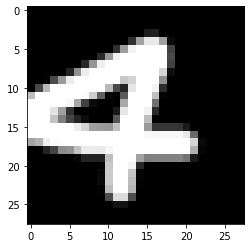

In [18]:
# image file의 경로 설정
cur_dir = os.getcwd()
img_path = os.path.join(cur_dir, 'image.png')

# image file 읽기
cur_img = Image.open(img_path)

# 28x28로 resize
cur_img = cur_img.resize((28, 28))
image = np.asarray(cur_img)

# color image일 경우 RGB 평균값으로 gray scale로 변경
try:
  image = np.mean(image, axis=2)
except:
  pass

# upload한 image는 흰 배경에 검은 글씨로 되어 있으므로, MNIST data와 같이 검은 배경에 흰 글씨로 변경
image = np.abs(255-image)

# MNIST와 동일하게 data preprocessing(255로 나눠줌)
image = image.astype(np.float32)/255

# 화면에 출력하여 확인
plt.imshow(image, cmap='gray')
plt.show()

In [19]:
image = torch.as_tensor(image).to(device).reshape(1, 1, 28, 28)
model.eval()
predict = model(image)
print("Model이 예측한 값은 {} 입니다.".format(predict.argmax(1).item()))

Model이 예측한 값은 7 입니다.


Tensor

In [20]:
# list로 부터 직접 tensor 생성하기
data = [[1, 2], [3, 4]]
x_data = torch.tensor(data)
print(x_data)

tensor([[1, 2],
        [3, 4]])


In [21]:
# numpy array로 부터 tensor 생성하기
np_array = np.array(data)
x_np_1 = torch.tensor(np_array)
print(x_np_1)

tensor([[1, 2],
        [3, 4]], dtype=torch.int32)


In [22]:
x_np_2 = torch.as_tensor(np_array)
print(x_np_2)

tensor([[1, 2],
        [3, 4]], dtype=torch.int32)


In [31]:
x_np_3 = torch.from_numpy(np_array)
print(x_np_3)

tensor([[6, 2],
        [3, 4]], dtype=torch.int32)


In [24]:
x_np_1[0, 0] =5
print(x_np_1)
print(np_array)

tensor([[5, 2],
        [3, 4]], dtype=torch.int32)
[[1 2]
 [3 4]]


In [25]:
x_np_2[0, 0] = 6
print(x_np_2)
print(np_array)

tensor([[6, 2],
        [3, 4]], dtype=torch.int32)
[[6 2]
 [3 4]]


In [32]:
x_np_3[0,0] = 7
print(x_np_3)
print(np_array)

tensor([[7, 2],
        [3, 4]], dtype=torch.int32)
[[7 2]
 [3 4]]


In [33]:
np_again = x_np_1.numpy()
print(np_again, type(np_again))

[[5 2]
 [3 4]] <class 'numpy.ndarray'>


In [34]:
a = torch.ones(2, 3)
b = torch.zeros(2, 3)
c = torch.full((2, 3), 2)
d = torch.empty(2, 3)
print(a)
print(b)
print(c)
print(d)

tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([[2, 2, 2],
        [2, 2, 2]])
tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [36]:
e = torch.zeros_like(c)
f = torch.ones_like(c)
g = torch.full_like(c, 3)
h = torch.empty_like(c)
print(e)
print(f)
print(g)
print(h)

tensor([[0, 0, 0],
        [0, 0, 0]])
tensor([[1, 1, 1],
        [1, 1, 1]])
tensor([[3, 3, 3],
        [3, 3, 3]])
tensor([[      5894003952256, 4296802540818988816, 4287873106241292304],
        [4290838132615971775, 4298849195817003087,                   0]])


In [37]:
i = torch.eye(3)
print(i)

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])


In [38]:
j = torch.rand(2, 2)
print(j)

tensor([[0.8805, 0.3865],
        [0.4651, 0.7718]])


In [39]:
k = torch.rand(2, 2)
l = torch.randn(2, 2)
print(k)
print(l)

tensor([[0.5386, 0.0012],
        [0.7108, 0.2333]])
tensor([[1.8070, 1.3436],
        [1.2578, 0.7544]])


Tensor의 속성

In [40]:
tensor = torch.rand(3, 4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


In [42]:
# 속성 변경
tensor = tensor.reshape(4, 3)
tensor = tensor.int()
if torch.cuda.is_available():
    tensor = tensor.to('cuda')

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([4, 3])
Datatype of tensor: torch.int32
Device tensor is stored on: cpu


Indexing과 Slicing

In [43]:
a = torch.arange(1, 13).reshape(3, 4)
print(a)

tensor([[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]])


In [44]:
# indexing
print(a[1])
print(a[0, -1])

tensor([5, 6, 7, 8])
tensor(4)


In [45]:
# slicing
print(a[1:-1])
print(a[:2, 2:])

tensor([[5, 6, 7, 8]])
tensor([[3, 4],
        [7, 8]])


Transpose

In [46]:
a = torch.arange(16).reshape(2, 2, 4)
print(a, a.shape)

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7]],

        [[ 8,  9, 10, 11],
         [12, 13, 14, 15]]]) torch.Size([2, 2, 4])


In [47]:
b = a.transpose(1, 2)
print(b, b.shape)

tensor([[[ 0,  4],
         [ 1,  5],
         [ 2,  6],
         [ 3,  7]],

        [[ 8, 12],
         [ 9, 13],
         [10, 14],
         [11, 15]]]) torch.Size([2, 4, 2])


In [48]:
c = a.permute((2, 0, 1))
print(c, c.shape)

tensor([[[ 0,  4],
         [ 8, 12]],

        [[ 1,  5],
         [ 9, 13]],

        [[ 2,  6],
         [10, 14]],

        [[ 3,  7],
         [11, 15]]]) torch.Size([4, 2, 2])


Tensor 연산

In [49]:
x = torch.tensor([[1, 2], [3, 4]], dtype=torch.float32)
y = torch.tensor([[5, 6], [7, 8]], dtype=torch.float32)
print(x)
print(y)

tensor([[1., 2.],
        [3., 4.]])
tensor([[5., 6.],
        [7., 8.]])


In [50]:
print(x + y)
print(x - y)
print(x * y)
print(x / y)
print(x @ y)
print('='*30)
print(torch.add(x, y))
print(torch.subtract(x, y))
print(torch.multiply(x, y))
print(torch.divide(x, y))
print(torch.matmul(x, y))

tensor([[ 6.,  8.],
        [10., 12.]])
tensor([[-4., -4.],
        [-4., -4.]])
tensor([[ 5., 12.],
        [21., 32.]])
tensor([[0.2000, 0.3333],
        [0.4286, 0.5000]])
tensor([[19., 22.],
        [43., 50.]])
tensor([[ 6.,  8.],
        [10., 12.]])
tensor([[-4., -4.],
        [-4., -4.]])
tensor([[ 5., 12.],
        [21., 32.]])
tensor([[0.2000, 0.3333],
        [0.4286, 0.5000]])
tensor([[19., 22.],
        [43., 50.]])


In [52]:
# in-place 연산
print(x.add(y))
print(x)
print(x.add_(y))
print(x)

tensor([[ 6.,  8.],
        [10., 12.]])
tensor([[1., 2.],
        [3., 4.]])
tensor([[ 6.,  8.],
        [10., 12.]])
tensor([[ 6.,  8.],
        [10., 12.]])


In [54]:
z =torch.arange(1, 11).reshape(2, 5)
print(z)

tensor([[ 1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10]])


In [55]:
sum1 = torch.sum(z, axis=0)
sum2 = torch.sum(z, axis=1)
sum3 = torch.sum(z, axis=-1)
print(sum1, sum1.shape)
print(sum2, sum2.shape)
print(sum3, sum3.shape)

tensor([ 7,  9, 11, 13, 15]) torch.Size([5])
tensor([15, 40]) torch.Size([2])
tensor([15, 40]) torch.Size([2])


In [56]:
a =torch.arange(24).reshape(4, 6)
b = a.clone().detach()
print(a, a.shape)
print(b, b.shape)

tensor([[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11],
        [12, 13, 14, 15, 16, 17],
        [18, 19, 20, 21, 22, 23]]) torch.Size([4, 6])
tensor([[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11],
        [12, 13, 14, 15, 16, 17],
        [18, 19, 20, 21, 22, 23]]) torch.Size([4, 6])


In [57]:
c = torch.cat([a, b], axis=0)
print(c, c.shape)

tensor([[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11],
        [12, 13, 14, 15, 16, 17],
        [18, 19, 20, 21, 22, 23],
        [ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11],
        [12, 13, 14, 15, 16, 17],
        [18, 19, 20, 21, 22, 23]]) torch.Size([8, 6])


In [58]:
c = torch.cat([a, b], axis=-1)
print(c, c.shape)

tensor([[ 0,  1,  2,  3,  4,  5,  0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11,  6,  7,  8,  9, 10, 11],
        [12, 13, 14, 15, 16, 17, 12, 13, 14, 15, 16, 17],
        [18, 19, 20, 21, 22, 23, 18, 19, 20, 21, 22, 23]]) torch.Size([4, 12])


In [62]:
d = torch.stack([a, b], axis= 0)
print(c, c.shape)

tensor([[[ 0,  0],
         [ 1,  1],
         [ 2,  2],
         [ 3,  3],
         [ 4,  4],
         [ 5,  5]],

        [[ 6,  6],
         [ 7,  7],
         [ 8,  8],
         [ 9,  9],
         [10, 10],
         [11, 11]],

        [[12, 12],
         [13, 13],
         [14, 14],
         [15, 15],
         [16, 16],
         [17, 17]],

        [[18, 18],
         [19, 19],
         [20, 20],
         [21, 21],
         [22, 22],
         [23, 23]]]) torch.Size([4, 6, 2])


In [63]:
d = torch.stack([a, b], axis=-1)
print(c, c.shape)

tensor([[[ 0,  0],
         [ 1,  1],
         [ 2,  2],
         [ 3,  3],
         [ 4,  4],
         [ 5,  5]],

        [[ 6,  6],
         [ 7,  7],
         [ 8,  8],
         [ 9,  9],
         [10, 10],
         [11, 11]],

        [[12, 12],
         [13, 13],
         [14, 14],
         [15, 15],
         [16, 16],
         [17, 17]],

        [[18, 18],
         [19, 19],
         [20, 20],
         [21, 21],
         [22, 22],
         [23, 23]]]) torch.Size([4, 6, 2])


Dataset/ Dataloader

FasionMNIST data 불러오기

In [64]:
from torch.utils.data import Dataset, dataloader
import torchvision.transforms as tf

In [66]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

100%|██████████| 26421880/26421880 [00:15<00:00, 1691218.92it/s]


Extracting data\FashionMNIST\raw\train-images-idx3-ubyte.gz to data\FashionMNIST\raw



100%|██████████| 29515/29515 [00:00<00:00, 98234.47it/s]


Extracting data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to data\FashionMNIST\raw



100%|██████████| 4422102/4422102 [00:03<00:00, 1118203.49it/s]


Extracting data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to data\FashionMNIST\raw



100%|██████████| 5148/5148 [00:00<?, ?it/s]

Extracting data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to data\FashionMNIST\raw



데이터 시각화하기

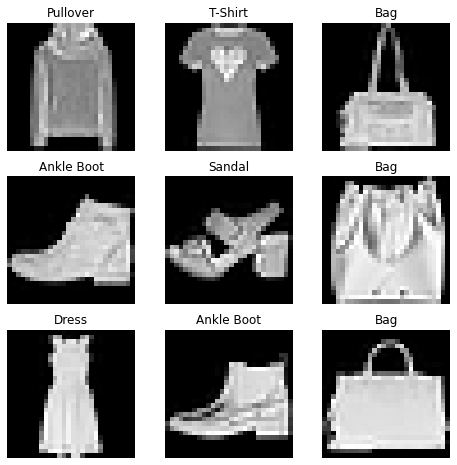

In [67]:
labels_map ={
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows +1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

DataLoader 만들기

In [87]:
# DataLoader 만들기
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=False)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


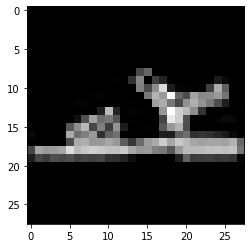

Label: 5


In [88]:
# DataLoader를 통해 반복하기(iterate)
# 이미지와 정답(label)을 표시합니다.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

Custom Dataset, Data Loader 만들기

In [89]:
# 간단한 Custom Dataset/Transform/DataLoader 만들기

class CustomDataset(Dataset):
  def __init__(self, np_data, transform=None):
    self.data = np_data
    self.transform = transform
    self.len = np_data.shape[0]
  def __len__(self):
    return self.len
  def __getitem__(self, idx):    
    sample = self.data[idx]
    if self.transform:
      sample = self.transform(sample)
    return sample

In [90]:
def square(sample):
  return sample**2

In [91]:
trans =tf.Compose([square])

In [93]:
np_data = np.arange(10)

custom_dataset = CustomDataset(np_data, transform=trans)

In [94]:
custom_dataloader = DataLoader(custom_dataset, batch_size=2, shuffle=True)

In [96]:
for _ in range(3):
    for data in custom_dataloader:
        print(data)
    print("="*30)

tensor([25,  0], dtype=torch.int32)
tensor([16,  1], dtype=torch.int32)
tensor([64, 49], dtype=torch.int32)
tensor([ 4, 81], dtype=torch.int32)
tensor([36,  9], dtype=torch.int32)
tensor([16, 49], dtype=torch.int32)
tensor([ 1, 36], dtype=torch.int32)
tensor([81,  4], dtype=torch.int32)
tensor([ 0, 25], dtype=torch.int32)
tensor([ 9, 64], dtype=torch.int32)
tensor([ 4, 36], dtype=torch.int32)
tensor([ 0, 81], dtype=torch.int32)
tensor([16, 64], dtype=torch.int32)
tensor([25,  1], dtype=torch.int32)
tensor([ 9, 49], dtype=torch.int32)


Model

In [97]:
# device 설정
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Using {} device'.format(device))

Using cpu device


Model class 만들기

In [98]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 10)
        )
    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [99]:
# Model instance 생성, device 설정
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=128, out_features=10, bias=True)
  )
)


In [100]:
# 가상의 data 만들어서 예측해보기
X = torch.rand(1, 28, 28, device=device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

Predicted class: tensor([8])


Training / Validation

Loss Function

In [101]:
# 손실 함수를 초기화합니다.
loss_fn = nn.CrossEntropyLoss()

Optimizer

In [102]:
learning_rate = 1e-3
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

Traing / Validation(Test) Function

In [108]:
# Training을 위한 함수
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        # 예측(prediction)과 손실(loss) 계산
        pred = model(X)
        loss = loss_fn(pred, y)

        # 역전파
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

# Test를 위한 함수
def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")


In [109]:
# 학습 진행하기
epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 0.364675  [    0/60000]
loss: 0.260083  [ 6400/60000]
loss: 0.404133  [12800/60000]
loss: 0.320986  [19200/60000]
loss: 0.223118  [25600/60000]
loss: 0.411432  [32000/60000]
loss: 0.376992  [38400/60000]
loss: 0.269731  [44800/60000]
loss: 0.339175  [51200/60000]
loss: 0.512556  [57600/60000]
Test Error: 
 Accuracy: 85.5%, Avg loss: 0.404356 

Epoch 2
-------------------------------
loss: 0.445800  [    0/60000]
loss: 0.416865  [ 6400/60000]
loss: 0.401875  [12800/60000]
loss: 0.301045  [19200/60000]
loss: 0.306308  [25600/60000]
loss: 0.245554  [32000/60000]
loss: 0.385668  [38400/60000]
loss: 0.540549  [44800/60000]
loss: 0.296320  [51200/60000]
loss: 0.483615  [57600/60000]
Test Error: 
 Accuracy: 85.9%, Avg loss: 0.395008 

Epoch 3
-------------------------------
loss: 0.302023  [    0/60000]
loss: 0.420964  [ 6400/60000]
loss: 0.330156  [12800/60000]
loss: 0.403955  [19200/60000]
loss: 0.319304  [25600/60000]
loss: 0.401266  [32000/600

Model 저장하고 불러오기

Model 전체를 저장하고 불러오기

In [112]:
# 학습된 model parameter 저장
torch.save(model.state_dict(), 'model_weights.pth')

In [113]:
# 새 Model instance 생성, device 설정
model2 = NeuralNetwork().to(device)
print(model2)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=128, out_features=10, bias=True)
  )
)


In [114]:
# test
model2.eval()
test_loop(test_dataloader, model2, loss_fn)

Test Error: 
 Accuracy: 7.6%, Avg loss: 2.321745 



In [115]:
# 저장한 parameter 불러오기
model2.load_state_dict(torch.load('model_weights.pth'))

<All keys matched successfully>

In [116]:
# test
model2.eval()
test_loop(test_dataloader, model2, loss_fn)

Test Error: 
 Accuracy: 87.8%, Avg loss: 0.347159 



In [117]:
# 저장하기
torch.save(model, 'model.pth')

In [118]:
# 불러오기
model3 = torch.load('model.pth')

In [119]:
# test
model3.eval()
test_loop(test_dataloader, model2, loss_fn)

Test Error: 
 Accuracy: 87.8%, Avg loss: 0.347159 



Tensorboard 사용하여 시각화하기

In [120]:
# Load the Tensorboard notebook extension
%load_ext tensorboard

In [121]:
from torch.utils.tensorboard import SummaryWriter

writer = SummaryWriter('./logs/pytorch')

In [122]:
# 새 Model insatance 생성, device 설정
model4 = NeuralNetwork().to(device)
print(model4)

model4.eval()
test_loop(test_dataloader, model4, loss_fn)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=128, out_features=10, bias=True)
  )
)
Test Error: 
 Accuracy: 11.6%, Avg loss: 2.319239 



In [123]:
X = torch.rand(1, 28, 28, device=device)
writer.add_graph(model4, X)

In [130]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    total_loss = 0.
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # 예측(prediction)과 손실(loss) 계산
        pred = model(X)
        loss = loss_fn(pred, y)

        # 역전파
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
        
        total_loss += loss / len(dataloader)
    return total_loss

In [131]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    return test_loss

In [132]:
parameters = ['Weight1', 'Bias1', 'Weight2', 'Bias2']

epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loss = train(train_dataloader, model, loss_fn, optimizer)
    writer.add_scalar('training loss', train_loss, t)
    for param, name in zip(model.parameters(), parameters):
        writer.add_histogram(name, param, t)
    test_loss = test(test_dataloader, model, loss_fn)
    writer.add_scalar('test_loss', test_loss, t)
print("Done!")

Epoch 1
-------------------------------
loss: 0.434175  [    0/60000]
loss: 0.275901  [ 6400/60000]
loss: 0.264619  [12800/60000]
loss: 0.254930  [19200/60000]
loss: 0.329442  [25600/60000]
loss: 0.317349  [32000/60000]
loss: 0.294884  [38400/60000]
loss: 0.168812  [44800/60000]
loss: 0.216519  [51200/60000]
loss: 0.254982  [57600/60000]
Test Error: 
 Accuracy: 88.6%, Avg loss: 0.326167 

Epoch 2
-------------------------------
loss: 0.376288  [    0/60000]
loss: 0.275926  [ 6400/60000]
loss: 0.188764  [12800/60000]
loss: 0.218960  [19200/60000]
loss: 0.299395  [25600/60000]
loss: 0.293198  [32000/60000]
loss: 0.367879  [38400/60000]
loss: 0.201870  [44800/60000]
loss: 0.271067  [51200/60000]
loss: 0.435266  [57600/60000]
Test Error: 
 Accuracy: 88.3%, Avg loss: 0.329609 

Epoch 3
-------------------------------
loss: 0.473483  [    0/60000]
loss: 0.154071  [ 6400/60000]
loss: 0.236052  [12800/60000]
loss: 0.155508  [19200/60000]
loss: 0.164478  [25600/60000]
loss: 0.336403  [32000/600

In [133]:
writer.close()

In [134]:
%tensorboard --logdir './logs/pytorch'